In [22]:
# SARA KHALILI
# github repo: https://github.com/sarakh9/datamining-project-# 

In [41]:
# IMPORTING TOOLS

import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns

In [42]:
# LOADDING THE DATASET
letter_arrf = arff.loadarff('letter.arff')
df = pd.DataFrame(letter_arrf[0])
df.dropna(inplace=True)
features = df.columns.to_list()[0:15] #removing class
df = df[features]
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0


In [43]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000


In [44]:
df.dtypes

x-box    float64
y-box    float64
width    float64
high     float64
onpix    float64
x-bar    float64
y-bar    float64
x2bar    float64
y2bar    float64
xybar    float64
x2ybr    float64
xy2br    float64
x-ege    float64
xegvy    float64
y-ege    float64
dtype: object

In [45]:
# TRASFORM DATA
scaler = StandardScaler()
df_scaled = pd.DataFrame()
df_scaled[features] = scaler.fit_transform(df[features]) # transforme data & 
                                                     # save transformed (normalized) data in df_t
df_scaled.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,-1.057698,-0.918603,-0.556881,-1.049137,-0.687476,0.050543,0.214833,-0.973591,1.605094,1.092242,0.207525,-0.446513,-0.877220,-0.219082,0.509640
1,-0.012309,-0.010743,-0.060486,-0.164704,0.682135,-0.936631,0.644886,0.507945,-0.495072,-0.113345,0.207525,0.514764,-0.448492,0.427463,1.288757
2,1.555774,0.897117,1.428701,0.719730,0.225598,0.544130,0.214833,0.137561,2.025128,1.092242,-1.692890,0.034125,-0.448492,-2.158715,0.509640
3,-0.012309,0.594497,-0.060486,0.719730,0.225598,0.050543,-0.215220,3.100633,-1.755172,-0.515208,-0.172558,0.034125,-0.019764,-0.219082,-1.438153
4,1.033079,-0.010743,1.428701,-0.164704,0.225598,0.050543,-0.645273,-0.603207,0.765028,0.690380,0.207525,0.514764,-0.019764,-0.219082,-0.269477


In [46]:
# K-MEANS ALGORITHM
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled.values)
df_scaled['kmeans'] = clusters
df_scaled.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,kmeans
0,-1.057698,-0.918603,-0.556881,-1.049137,-0.687476,0.050543,0.214833,-0.973591,1.605094,1.092242,0.207525,-0.446513,-0.877220,-0.219082,0.509640,1
1,-0.012309,-0.010743,-0.060486,-0.164704,0.682135,-0.936631,0.644886,0.507945,-0.495072,-0.113345,0.207525,0.514764,-0.448492,0.427463,1.288757,2
2,1.555774,0.897117,1.428701,0.719730,0.225598,0.544130,0.214833,0.137561,2.025128,1.092242,-1.692890,0.034125,-0.448492,-2.158715,0.509640,2
3,-0.012309,0.594497,-0.060486,0.719730,0.225598,0.050543,-0.215220,3.100633,-1.755172,-0.515208,-0.172558,0.034125,-0.019764,-0.219082,-1.438153,2
4,1.033079,-0.010743,1.428701,-0.164704,0.225598,0.050543,-0.645273,-0.603207,0.765028,0.690380,0.207525,0.514764,-0.019764,-0.219082,-0.269477,2


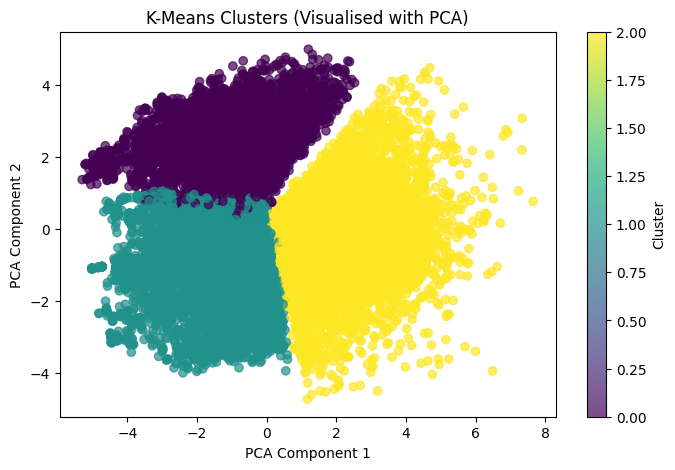

In [47]:
# VISUALIZATION
# dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (Visualised with PCA)')
plt.show()